In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.linalg import kron
import scipy as sp
import chi_sq as cs

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
# My own adds to Carles' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})

#################### photo_z / i-band magnitude bins ###################

pz_ranges = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, np.inf])
im_ranges = np.array([17, 18, 19, 20, 21, 22, 23, np.inf])
colorwheel = ['blue', 'red', 'green', 
              'orange', 'teal', 'purple', 
              'cyan', 'pink', 'olive']
colorwheel_dash = ['b--', 'r--', 'g--', 'y--']

########################## import data info ############################

ng_col_names = ['r_nom', 'meanr', 'meanlogr', 
                'gamT', 'gamX', 'sigma', 
                'weight', 'npairs']
ng_col_formats = ['f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']

nn_col_names = ['r_nom', 'meanr', 'meanlogr', 
                'xi', 'sigma_xi', 
                'DD', 'RR', 'DR', 'npairs']
nn_col_formats = ['f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']

In [3]:
data_ng_paths = cs.data_path_builder('NG', 'main', pz_ranges[1:-3])
data_nn_paths = cs.data_path_builder('NN', 'main', pz_ranges[1:-2])

data_ng_cov_paths = cs.data_path_builder('NG', 'cov', pz_ranges[1:-3])
data_nn_cov_paths = cs.data_path_builder('NN', 'cov', pz_ranges[1:-2])

theo_ng_theta_paths = cs.theo_path_builder('NG', 'theta', pz_ranges[1:-3])
theo_nn_theta_paths = cs.theo_path_builder('NN', 'theta', pz_ranges[1:-2])

theo_ng_xi_paths = cs.theo_path_builder('NG', 'xi', pz_ranges[1:-3])
theo_nn_xi_paths = cs.theo_path_builder('NN', 'xi', pz_ranges[1:-2])

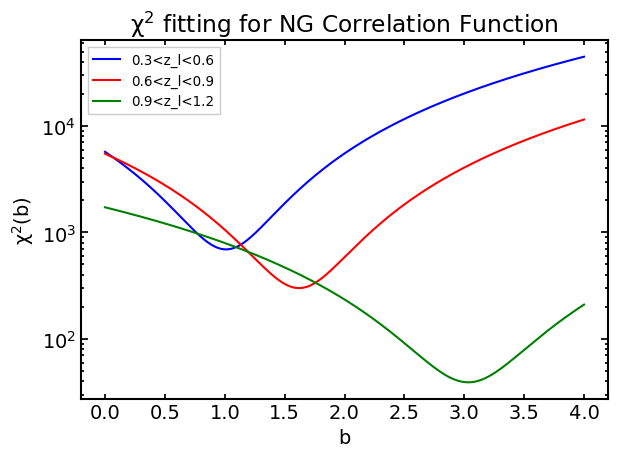

In [4]:
ng_min_b_full, ng_min_chi_full = cs.get_chi_sq_plots('NG', pz_ranges[1:-3], 'full')

In [5]:
print('NG corr min chi_sq:', ng_min_chi_full)
print('NG corr corresponding b:', ng_min_b_full)

NG corr min chi_sq: [693.13715513 300.03498901  39.11001899]
NG corr corresponding b: [1.01002004 1.61923848 3.03006012]


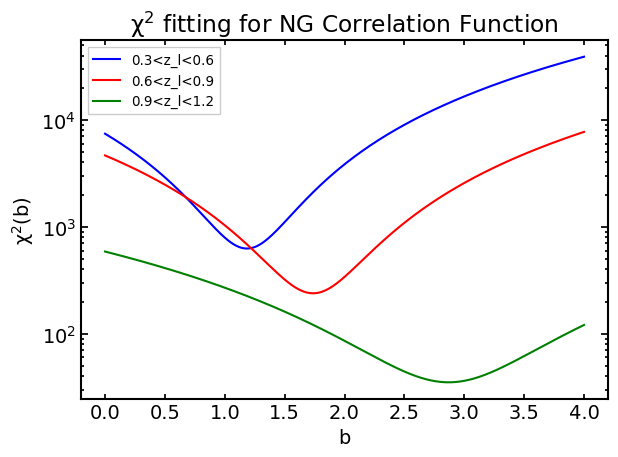

In [6]:
ng_min_b_diag, ng_min_chi_diag = cs.get_chi_sq_plots('NG', pz_ranges[1:-3], 'diag')

In [7]:
print('NG corr min chi_sq:', ng_min_chi_diag)
print('NG corr corresponding b:', ng_min_b_diag)

NG corr min chi_sq: [626.18731099 238.71908091  35.07527449]
NG corr corresponding b: [1.18637275 1.73947896 2.86973948]


In [8]:
def plot_b_chi_sq(corr, ax, b, pz_range, cov_prpt, color_wheel):
    for i in range(len(pz_range)):
        label = '{:.1f}<z_l<{:.1f}'.format(pz_range[i], pz_range[i]+0.3)
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, i, cov_prpt=cov_prpt)
        r_theo, xi_theo = cs.get_theo(corr, i)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model_mat = b[:,None]@xi_theo_interp[:,None].T
        elif (corr == 'NN'):
            xi_model_mat = (b**2)[:,None]@xi_theo_interp[:,None].T
        chi_sqs = np.ones(len(b))
        for j in range(len(b)):
            xi_model = xi_model_mat[j]
            chi_sq = cs.get_chi_sq(xi_data, xi_model, cov)
            chi_sqs[j] = chi_sq
        cs.plot_chi_sq(ax, b, chi_sqs, label, color_wheel[i])

In [9]:
def compare_chi_sq(corr, pz_range):
    b = np.linspace(0, 4, 500)
    fig, ax = plt.subplots(1, 1)
    plot_b_chi_sq(corr, ax, b, pz_range, 'full', colorwheel)
    ax.legend()
    ax.set_title(r'$\chi^2$ fitting for NG Correlation Function')
    plot_b_chi_sq(corr, ax, b, pz_range, 'diag', colorwheel_dash)
    return

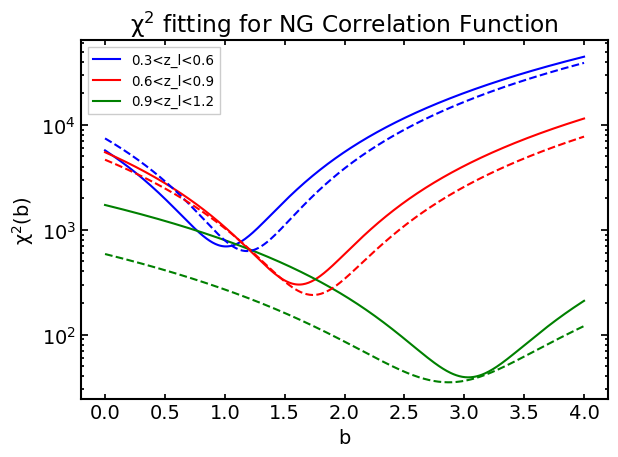

In [10]:
compare_chi_sq('NG', pz_ranges[1:-3])

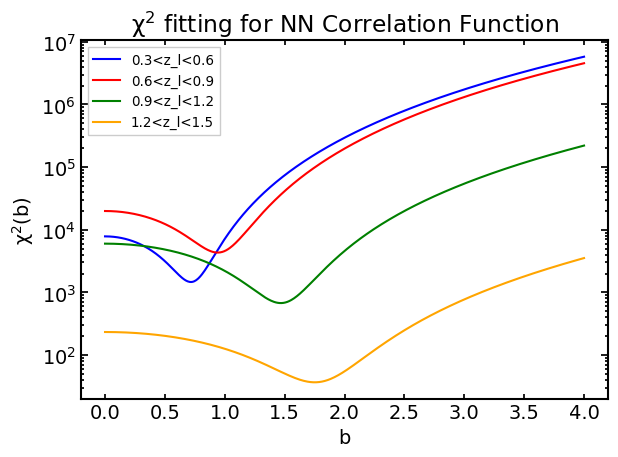

In [11]:
nn_min_b_full, nn_min_chi_full = cs.get_chi_sq_plots('NN', pz_ranges[1:-2], 'full')

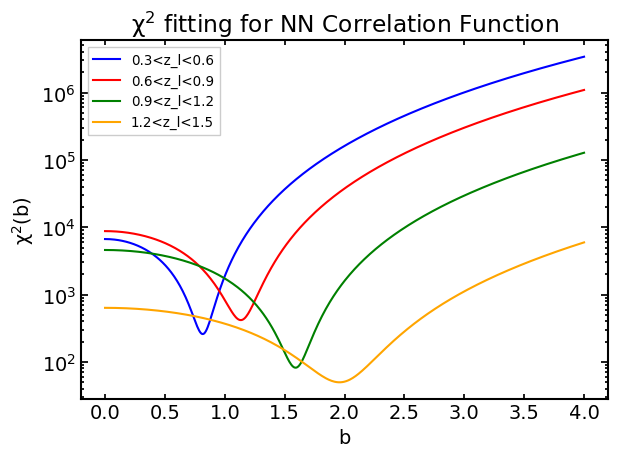

In [12]:
nn_min_b_diag, nn_min_chi_diag = cs.get_chi_sq_plots('NN', pz_ranges[1:-2], 'diag')

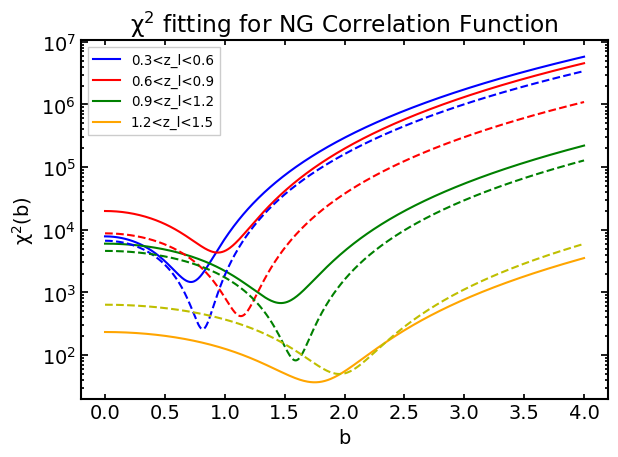

In [13]:
compare_chi_sq('NN', pz_ranges[1:-2])

In [15]:
def min_b_comp_mod(corr, pz_range, fig_size, min_b_full, min_b_diag):
    fig, ax = plt.subplots(len(pz_range), 2, figsize=fig_size)
    for i in range(len(pz_range)):
        b = min_b_full[i]
        title = '{:.1f}<z_l<{:.1f}, b={:.2f}'.format(pz_range[i], pz_range[i]+0.3, b)
        ax[i][0].set_title(title)
        ax[i][1].set_title(title)
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, i, cov_prpt='full')
        r_theo, xi_theo = cs.get_theo(corr, i)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
            
        cs.plot_xi_mod('scatter', ax[i][0], r_data, xi_data, 'Data', 'blue', xi_sig)
        cs.plot_xi_mod('plot', ax[i][0], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi_mod('plot', ax[i][0], r_data, xi_model, 'Model', 'green')
        
        cs.plot_xi('scatter', ax[i][1], r_data, xi_data, 'Data', 'blue', xi_sig)
        cs.plot_xi('plot', ax[i][1], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi('plot', ax[i][1], r_data, xi_model, 'Model', 'green')
        ax[i][1].legend()
    for j in range(len(pz_range)):
        b = min_b_diag[j]
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, j, cov_prpt='diag')
        r_theo, xi_theo = cs.get_theo(corr, j)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
            
        cs.plot_xi_mod('plot', ax[j][0], r_data, xi_model, 'Model', 'g--')
        cs.plot_xi('plot', ax[j][1], r_data, xi_model, 'Model', 'g--')
    return

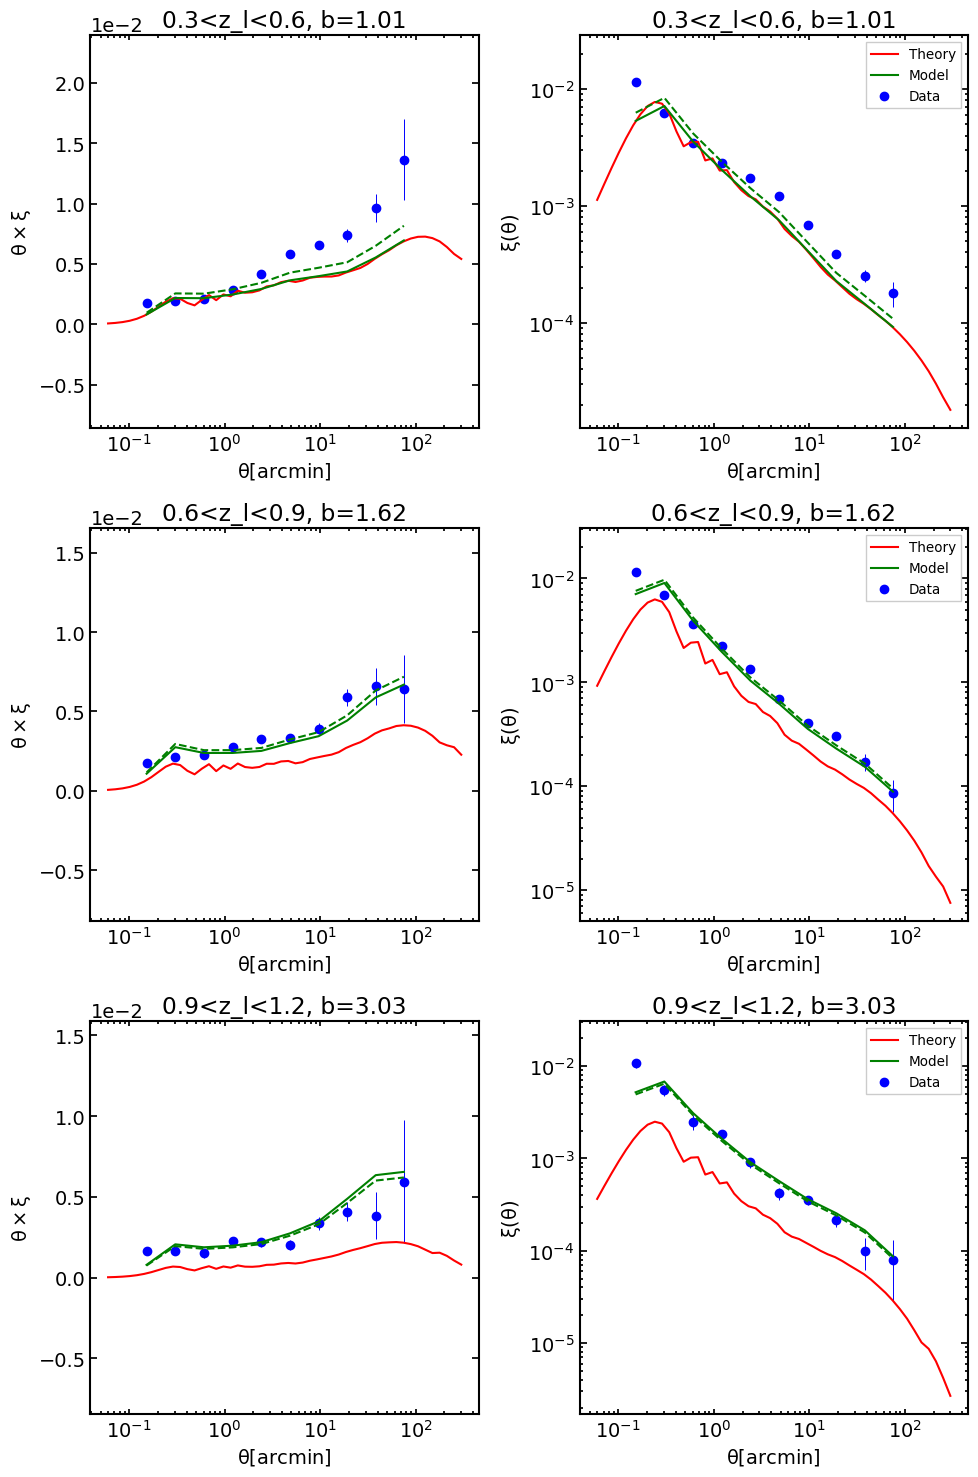

In [16]:
min_b_comp_mod('NG', pz_ranges[1:-3], (10, 15), ng_min_b_full, ng_min_b_diag)

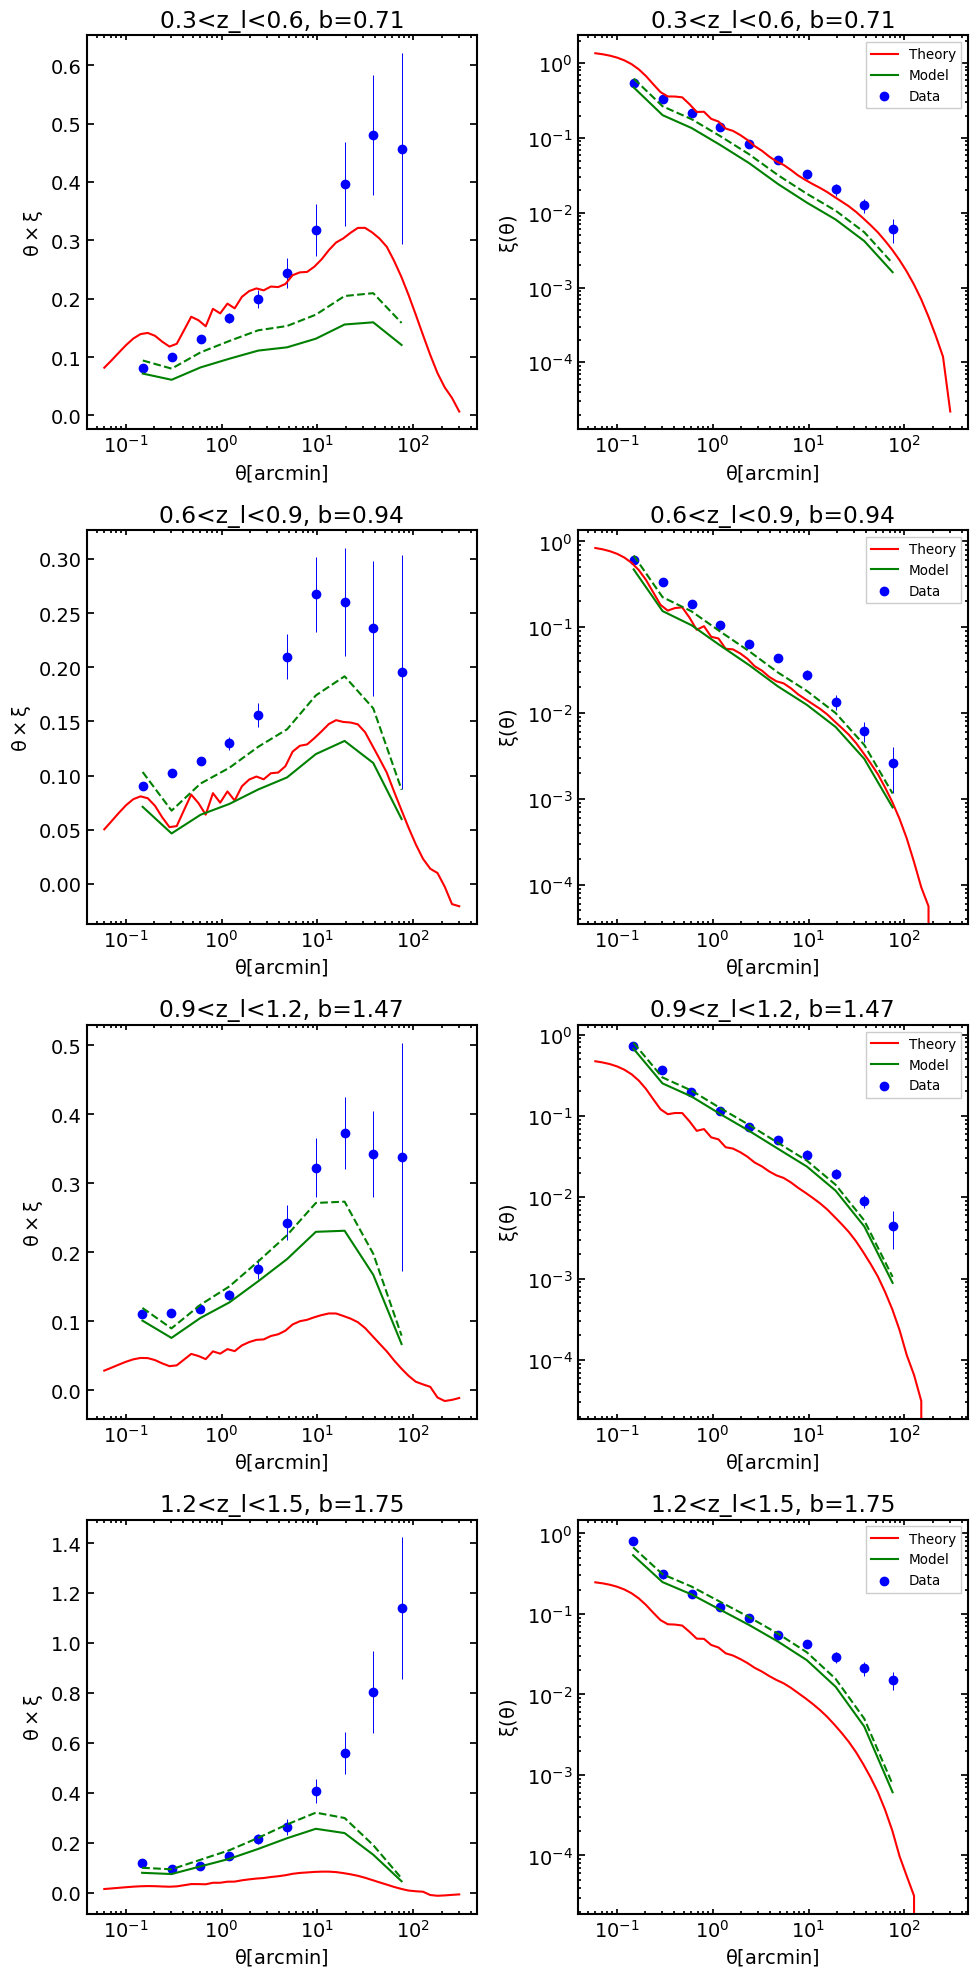

In [17]:
min_b_comp_mod('NN', pz_ranges[1:-2], (10, 20), nn_min_b_full, nn_min_b_diag)

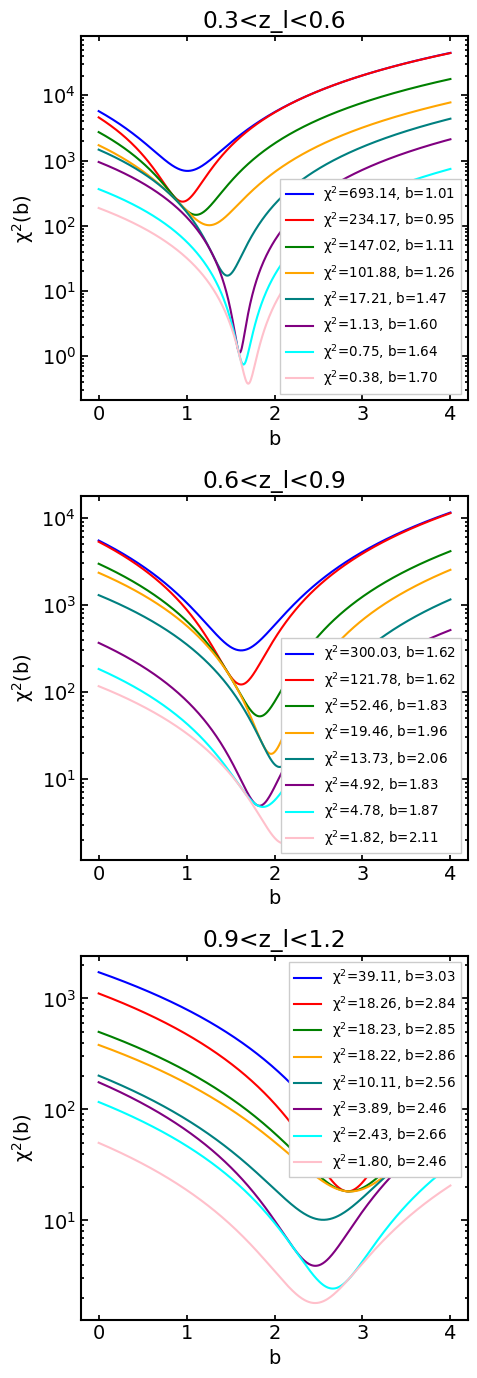

In [18]:
ng_min_b_new_full, ng_min_chi_new_full = cs.pop('NG', pz_ranges[1:-3], 'full', (5, 14))

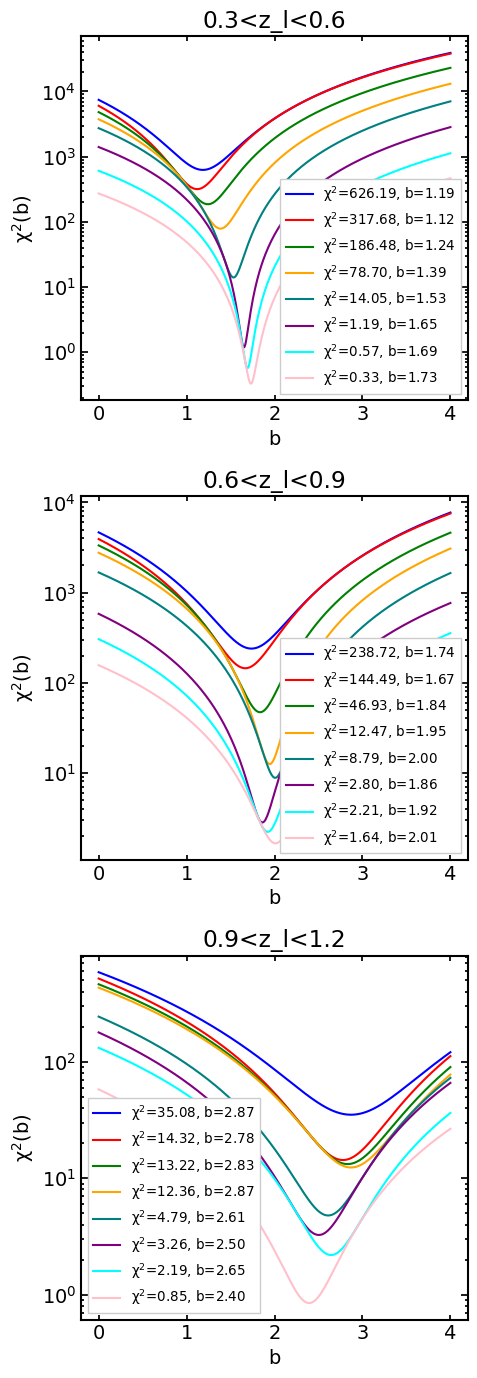

In [19]:
ng_min_b_new_diag, ng_min_chi_new_diag = cs.pop('NG', pz_ranges[1:-3], 'diag', (5, 14))

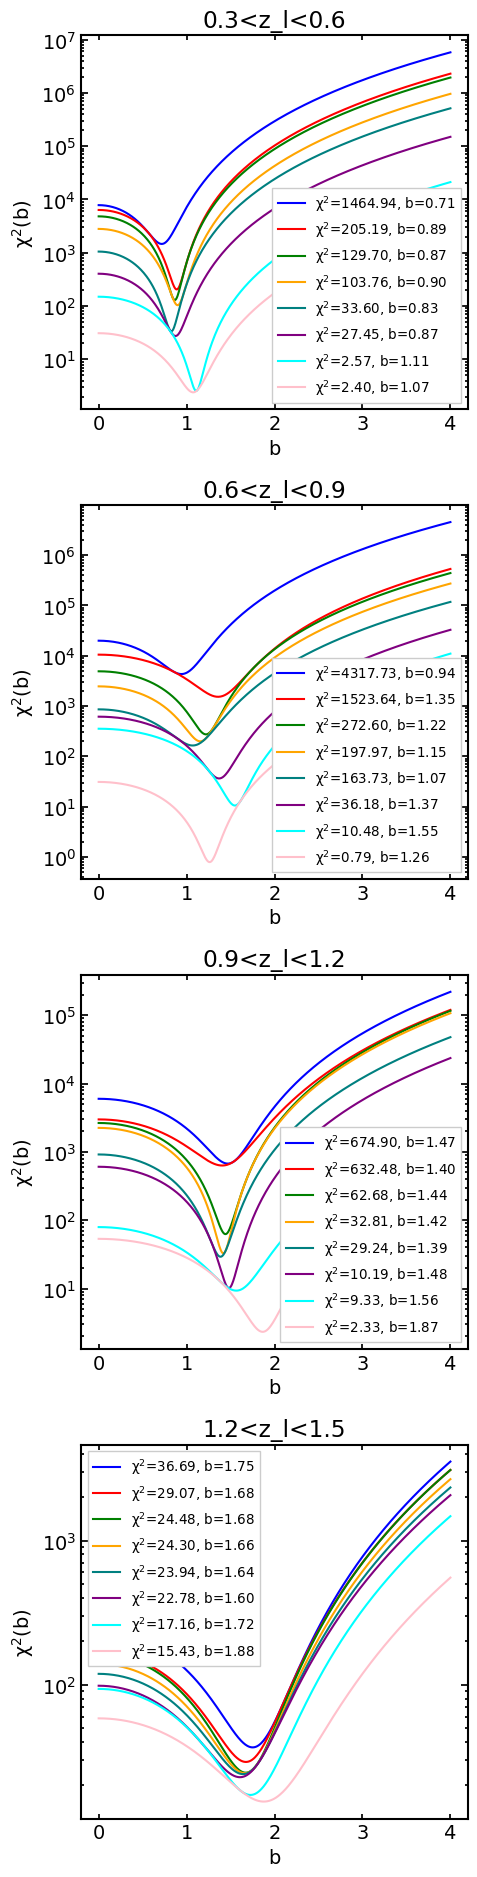

In [20]:
nn_min_b_new_full, nn_min_chi_new_full = cs.pop('NN', pz_ranges[1:-2], 'full', (5, 19))

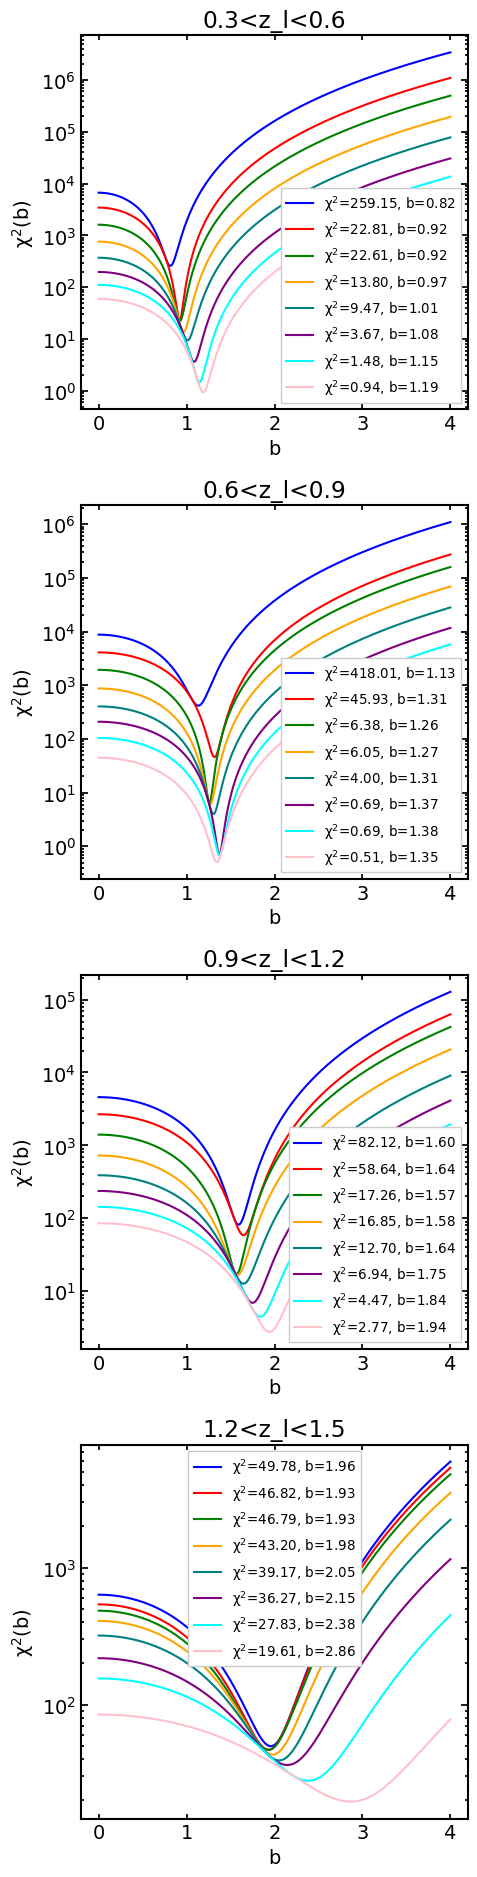

In [21]:
nn_min_b_new_diag, nn_min_chi_new_diag = cs.pop('NN', pz_ranges[1:-2], 'diag', (5, 19))

In [22]:
ng_r_min_pos = [3, 2, 0]
nn_r_min_pos = [4, 5, 2, 0]

In [23]:
### Criteria: first combi that brings chi^2 below 100 ###
def make_min_b_arr(corr, cov_prpt):
    if (corr == 'NG'):
        r_min_pos = ng_r_min_pos
        if (cov_prpt == 'full'):
            min_b_new = ng_min_b_new_full
            min_chi_new = ng_min_chi_new_full
        elif (cov_prpt == 'diag'):
            min_b_new = ng_min_b_new_diag
            min_chi_new = ng_min_chi_new_diag
    elif (corr == 'NN'):
        r_min_pos = nn_r_min_pos
        if (cov_prpt == 'full'):
            min_b_new = nn_min_b_new_full
            min_chi_new = nn_min_chi_new_full
        elif (cov_prpt == 'diag'):
            min_b_new = nn_min_b_new_diag
            min_chi_new = nn_min_chi_new_diag
    min_bs = np.zeros(len(r_min_pos))
    min_chis = np.zeros(len(r_min_pos))
    for i in range(len(r_min_pos)):
        min_bs[i] = min_b_new[i, r_min_pos[i]]
        min_chis[i] = min_chi_new[i, r_min_pos[i]]
    return min_bs, min_chis


ng_min_b_arr_full, ng_min_chi_arr_full = make_min_b_arr('NG', 'full')
ng_min_b_arr_diag, ng_min_chi_arr_diag = make_min_b_arr('NG', 'diag')
nn_min_b_arr_full, nn_min_chi_arr_full = make_min_b_arr('NN', 'full')
nn_min_b_arr_diag, nn_min_chi_arr_diag = make_min_b_arr('NN', 'diag')

In [24]:
def min_b_comp_new(corr, pz_range, r_min_pos, min_b_full, min_b_diag, min_chi_full, min_chi_diag, fig_size):
    '''
    Plot theta vs. xi, theta vs. theta*xi for the new b value. NG corr

    Parameters
    ----------
    corr : str
        'NG', 'NN'
    pz_range : arr
        Segment of pz_ranges.
    min_b : arr
        new b values that corresponds to minimum chi_sq.
    r_min_pos : arr
        position of first unpopped point.
    cov_prpt : str
        'full', 'diag'

    Returns
    -------
    None.

    '''
    fig, ax = plt.subplots(len(pz_range), 2, figsize=fig_size)
    #plot full
    for i in range(len(pz_range)):
        b = min_b_full[i]
        chi_sq = min_chi_full[i]
        chi_sq_dof = chi_sq/(10-r_min_pos[i]-1)
        title = r'{:.1f}<z_l<{:.1f}, $\xi^2/dof$ full={:.2f}'.format(pz_range[i], pz_range[i]+0.3, chi_sq_dof)
        ax[i][0].set_title(title)
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, i, cov_prpt='full')
        r_theo, xi_theo = cs.get_theo(corr, i)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
        
        cs.plot_xi_mod('scatter', ax[i][0], r_data, xi_data, 'Data', 'blue',  xi_sig)
        cs.plot_xi_mod('plot', ax[i][0], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi_mod('plot', ax[i][0], r_data, xi_model, 'Model', 'green')
        ax[i][0].axvline(x=r_data[r_min_pos[i]])
        
        cs.plot_xi('scatter', ax[i][1], r_data, xi_data, 'Data', 'blue', xi_sig)
        cs.plot_xi('plot', ax[i][1], r_theo, xi_theo, 'Theory', 'red')
        cs.plot_xi('plot', ax[i][1], r_data, xi_model, 'Model', 'green')
        ax[i][1].axvline(x=r_data[r_min_pos[i]])
        ax[i][1].legend()
    #plot diag
    for j in range(len(pz_range)):
        b = min_b_diag[j]
        chi_sq = min_chi_diag[j]
        chi_sq_dof = chi_sq/(10-r_min_pos[j]-1)
        title = r'b={:.2f}, $\xi^2/dof$ diag={:.2f}'.format(b, chi_sq_dof)
        ax[j][1].set_title(title)
        r_data, xi_data, xi_sig, cov = cs.get_data(corr, j, cov_prpt='diag')
        r_theo, xi_theo = cs.get_theo(corr, j)
        f = interpolate.interp1d(r_theo, xi_theo)
        xi_theo_interp = f(r_data)
        if (corr == 'NG'):
            xi_model = b*xi_theo_interp
        elif (corr == 'NN'):
            xi_model = (b**2)*xi_theo_interp
        cs.plot_xi_mod('plot', ax[j][0], r_data, xi_model, 'Model', 'g--')
        cs.plot_xi('plot', ax[j][1], r_data, xi_model, 'Model', 'g--')
    
    return

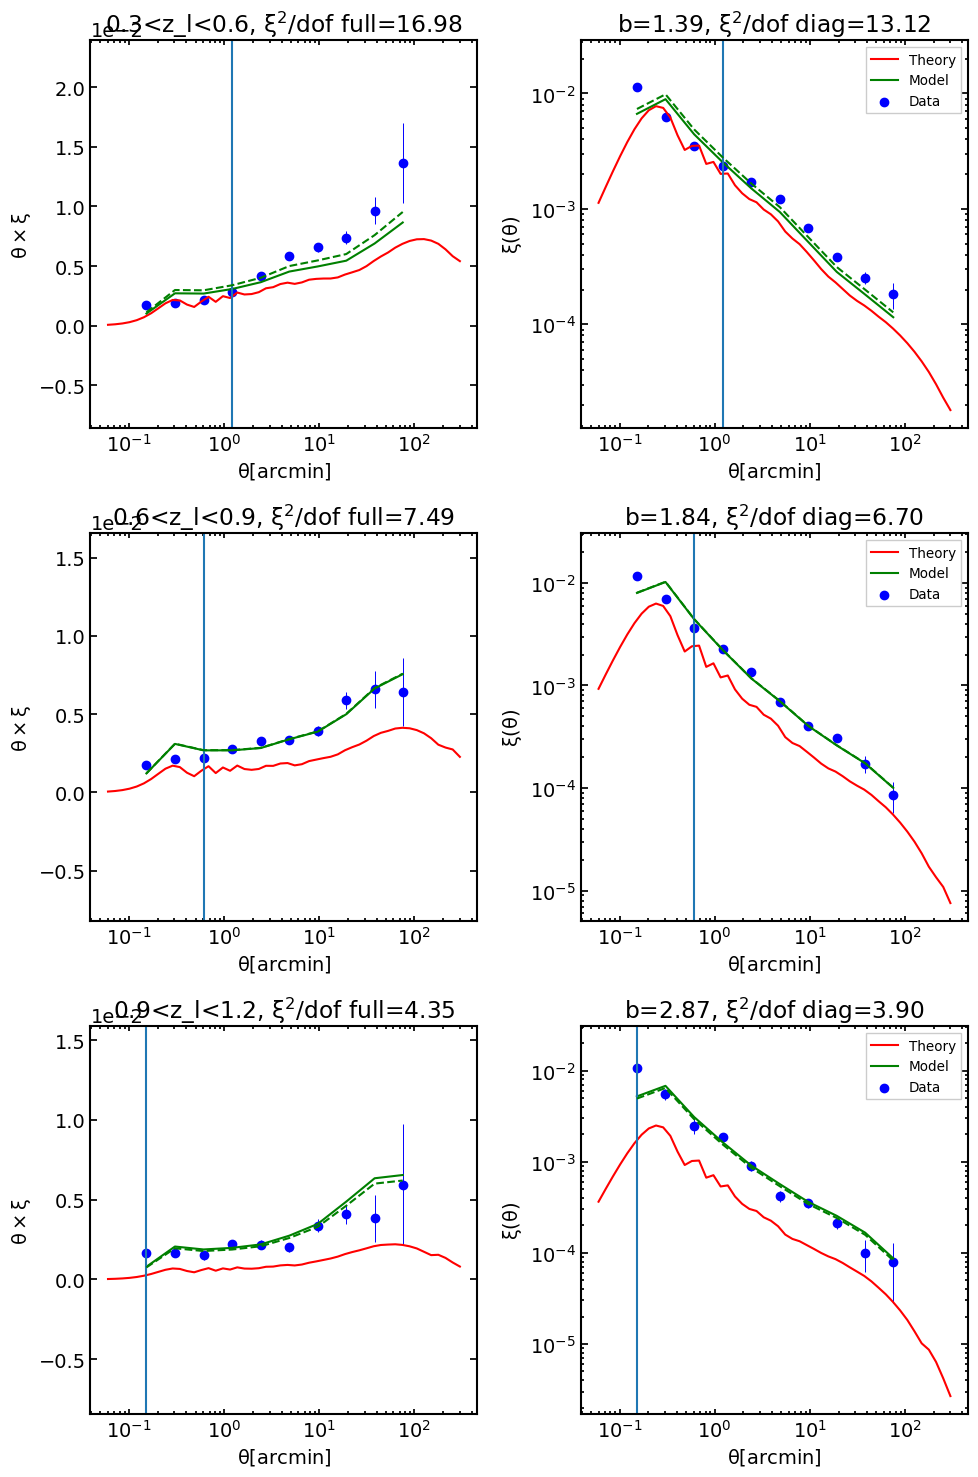

In [25]:
min_b_comp_new('NG', pz_ranges[1:-3], ng_r_min_pos, 
               ng_min_b_arr_full, ng_min_b_arr_diag, 
               ng_min_chi_arr_full, ng_min_chi_arr_diag,
               (10, 15))

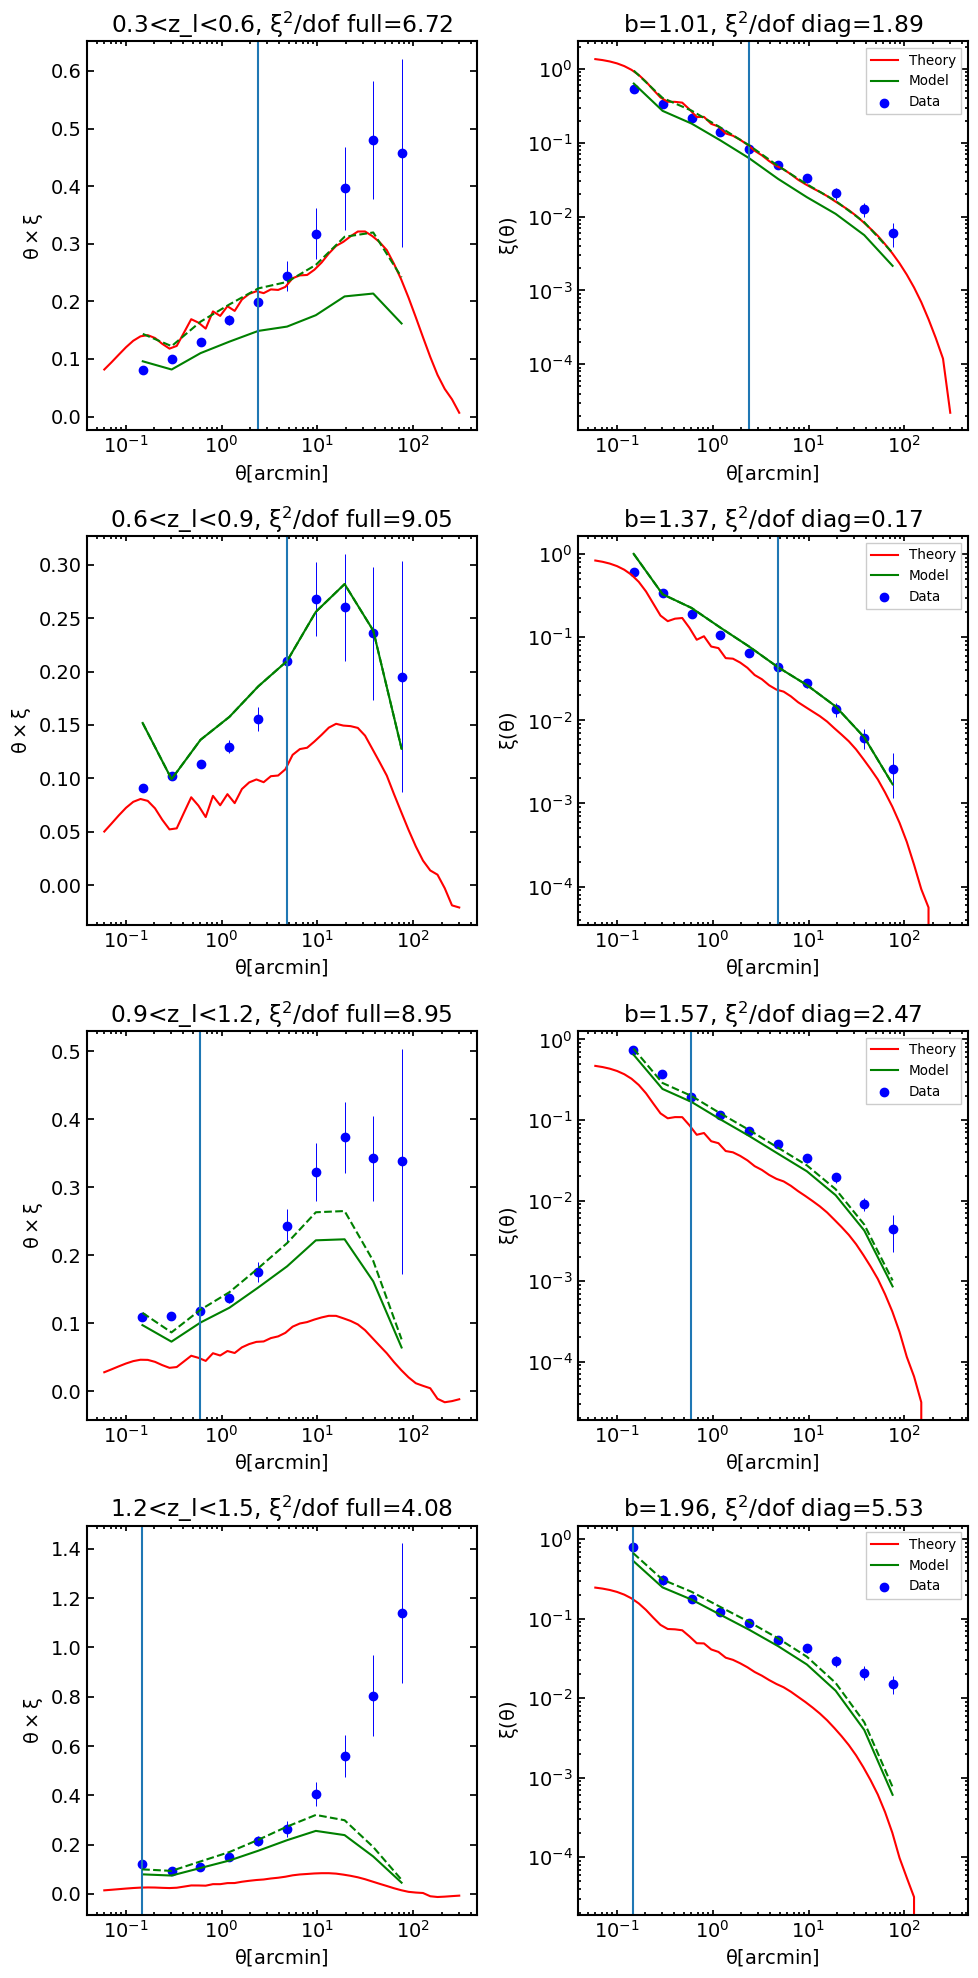

In [26]:
min_b_comp_new('NN', pz_ranges[1:-2], nn_r_min_pos, 
               nn_min_b_arr_full, nn_min_b_arr_diag, 
               nn_min_chi_arr_full, nn_min_chi_arr_diag,
               (10, 20))